In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("input/train.csv")

In [3]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,SI1,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,SI1,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,VS2,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,VVS2,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,VS2,60.5,56.0,7.19,7.12,4.33,8.741


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [5]:
data.shape

(40455, 11)

In [6]:
data.isna().sum().sort_values()


id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
data.cut.unique()

array(['Very Good', 'Ideal', 'Premium', 'Good', 'Fair'], dtype=object)

In [8]:
data.color.unique()

array(['G', 'D', 'I', 'H', 'J', 'F', 'E'], dtype=object)

In [9]:
data.clarity.unique()

array(['SI1', 'VS2', 'VVS2', 'SI2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [10]:
# https://4cs.gia.edu/en-us/blog/gia-diamond-grading-scales/
# ['IF', 'VS2', 'SI2', 'SI1', 'VVS2', 'VVS1', 'VS1', 'I1']
clarity_dic = {
    "IF":8,
    "VVS1":7,
    "VVS2":6,
    "VS1":5,
    "VS2":4,
    "SI1":3,
    "SI2":2,
    "I1":1
}
data.clarity=data.clarity.map(clarity_dic)

In [11]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,G,3,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,D,3,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,I,4,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,H,6,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,J,4,60.5,56.0,7.19,7.12,4.33,8.741


In [12]:
# https://4cs.gia.edu/en-us/blog/gia-diamond-grading-scales/
#(['H', 'E', 'G', 'F', 'D', 'I', 'J']

color_dic = {
    "D":8,
    "E":7,
    "F":6,
    "G":5,
    "H":4,
    "I":3,
    "J":2,
}
data.color=data.color.map(color_dic)

In [13]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,Very Good,5,3,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,Ideal,8,3,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,Ideal,3,4,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,Ideal,4,6,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,Premium,2,4,60.5,56.0,7.19,7.12,4.33,8.741


In [14]:
# https://4cs.gia.edu/en-us/blog/gia-diamond-grading-scales/
# ['Ideal', 'Very Good', 'Good', 'Premium', 'Fair']
cut_dic = {
    "Ideal":5,
    "Premium":4,
    "Very Good":3,
    "Good":2,
    "Fair":1
}
data.cut=data.cut.map(cut_dic)

In [15]:
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.53,3,5,3,63.4,54.0,5.09,5.13,3.24,7.057
1,1,0.41,5,8,3,63.0,56.0,4.80,4.75,3.01,6.824
2,2,0.32,5,3,4,61.6,56.0,4.37,4.39,2.70,6.107
3,3,0.31,5,4,6,61.2,56.0,4.34,4.37,2.66,6.390
4,4,1.35,4,2,4,60.5,56.0,7.19,7.12,4.33,8.741


In [16]:
corr_matrix = data.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
corr_matrix

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,-0.006186,0.005629,0.000642,0.010023,-0.002316,-0.010840,-0.005675,-0.004038,-0.005649,-0.004040
carat,-0.006186,1.000000,-0.134595,-0.288273,-0.351818,0.025261,0.182888,0.974744,0.950639,0.948895,0.920846
cut,0.005629,-0.134595,1.000000,0.019255,0.187300,-0.214650,-0.431898,-0.125591,-0.121415,-0.148694,-0.088745
color,0.000642,-0.288273,0.019255,1.000000,-0.027977,-0.048465,-0.026079,-0.266965,-0.260443,-0.263838,-0.153137
clarity,0.010023,-0.351818,0.187300,-0.027977,1.000000,-0.061204,-0.165201,-0.370832,-0.357405,-0.363581,-0.213545
depth,-0.002316,0.025261,-0.214650,-0.048465,-0.061204,1.000000,-0.298380,-0.028188,-0.032829,0.091738,-0.000533
table,-0.010840,0.182888,-0.431898,-0.026079,-0.165201,-0.298380,1.000000,0.197226,0.185480,0.150606,0.159950
x,-0.005675,0.974744,-0.125591,-0.266965,-0.370832,-0.028188,0.197226,1.000000,0.973473,0.966374,0.957934
y,-0.004038,0.950639,-0.121415,-0.260443,-0.357405,-0.032829,0.185480,0.973473,1.000000,0.946517,0.934832
z,-0.005649,0.948895,-0.148694,-0.263838,-0.363581,0.091738,0.150606,0.966374,0.946517,1.000000,0.931147


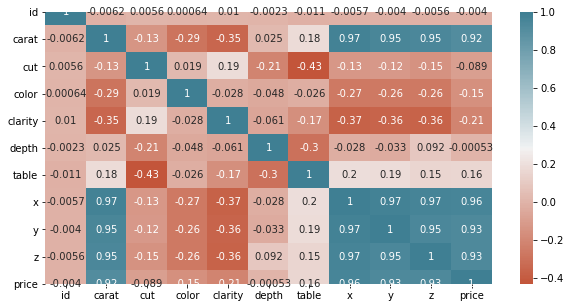

In [17]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(
    corr_matrix,
    cmap = sns.diverging_palette(20, 220, n=200),
    annot = True,

)

In [19]:
data.to_csv("output/clean_data.csv")